In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from scipy.interpolate import griddata
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import cartopy as cart
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean

from datetime import timedelta as delta
from datetime import datetime

import networkx as nx

from parcels import (grid, Field, FieldSet, ParticleSet, JITParticle, ScipyParticle, AdvectionRK4,
                     ErrorCode, ParticleFile, Variable, plotTrajectoriesFile)

from importlib import reload
import sys
sys.path.append('/home/students/4302001/arctic-connectivity/tools')
sys.path.append('/Users/daanreijnders/surfdrive/Thesis/repository/tools')
import plot
import lifeline
import community
import fieldsetter
import advectParticles

In [2]:
reload(plot)
reload(lifeline)
reload(community)
reload(fieldsetter)
reload(advectParticles)

<module 'advectParticles' from '/Users/daanreijnders/surfdrive/Thesis/repository/tools/advectParticles.py'>

In [4]:
readdir_ocean = '/users/daanreijnders/Datasets/'
fieldfile_ocean = 'daily_CESM_0.1degree_controlrun_year_300_arctic_timed_no_cord.nc'
readdir_mesh = '/users/daanreijnders/Datasets/'
meshfile = 'POP_grid_coordinates.nc'
writedir = ''

# readdir_ice = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ice/arctic/'
# readdir_ocean = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ocean/arctic/'
# readdir_mesh = '/scratch/DaanR/fields/'

# fieldfile_ocean = 'daily_CESM_0.1degree_controlrun_year_300_arctic_timed_no_cord.nc'
# fieldfile_ice = 'monthly_icefields_CESM_0.1degree_controlrun_year_300_arctic.nc'
# meshfile = 'POP_grid_coordinates.nc'

# writedir = ''

In [5]:
xr.open_dataset(readdir_ocean+fieldfile_ocean)

<xarray.Dataset>
Dimensions:  (i: 3600, j: 600, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-30
Dimensions without coordinates: i, j
Data variables:
    UVEL_5m  (time, j, i) float32 ...
    VVEL_5m  (time, j, i) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.6 (http://...
    Conventions:                POP MOVIE conventions
    history:                    Thu Jun 13 13:26:22 2019: cdo settunits,days ...
    title:                      POP MOVIE file
    nsteps_total:               36749272
    iyear:                      300
    imonth:                     1
    iday:                       2
    tday:                       109136.0
    NCO:                        "4.6.0"
    history_of_appended_files:  Wed May 15 12:35:10 2019: Appended file VVEL_...
    nco_openmp_thread_number:   1
    CDO:                        Climate Data Operators version 1.9.6 (http://...

In [6]:
fieldset = fieldsetter.read_velocity_field(readdir_ocean+fieldfile_ocean, 
                                           meshfile=readdir_mesh+meshfile)  

(<Figure size 432x288 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0xf21b02b00>)

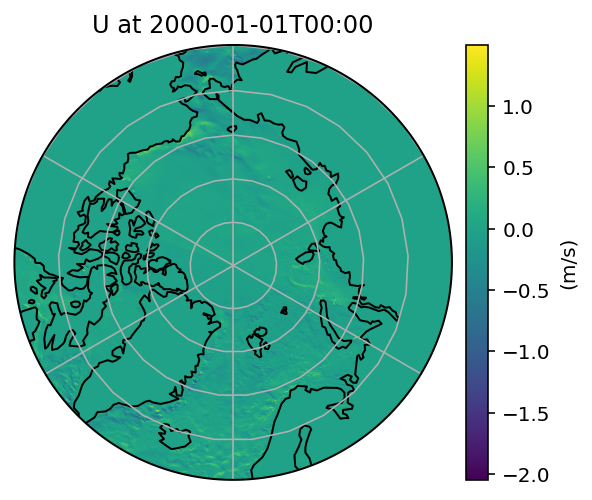

In [7]:
plot.from_field(fieldset.U, polar=True, land=False, latRange=(60,90))

In [8]:
#plot.from_field(fieldset.U, trajectoryFile='/data/oceanparcels/output_data/data_Daan/psets/pset_control_y300_P359x59_S2000-1-1_D30_DT5_ODT12_LAT60.5-89.5_LON-179.5-179.5.nc', polar=True, land=False, latRange=(60,90))

In [9]:
#add_ice_fields(fieldset, readdir_ice+fieldfile_ice, meshfile=readdir_mesh+meshfile)

In [10]:
countG = community.regularCountBins(360, 30)

In [11]:
particle = community.particles.from_regular_grid(3590, 590, releaseTime=datetime(2000,1,1))
particle.remove_on_land(fieldset)

<Figure size 432x288 with 0 Axes>

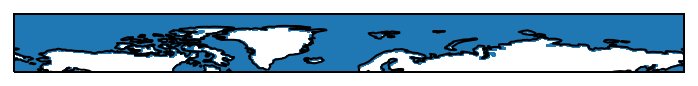

In [17]:
fig = plt.figure()
ax = particles.show()

(<Figure size 864x288 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0xf1cf06e80>)

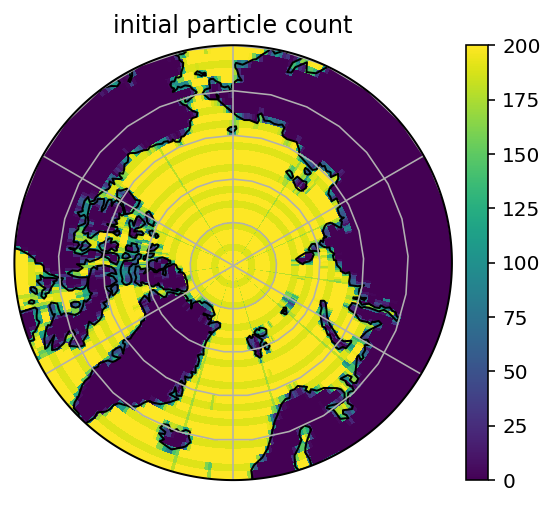

In [13]:
initCount = countG.particle_count(particle).T
plot.field_from_dataset(countG.lonBounds, countG.latBounds, initCount, latRange=(60,90), title='initial particle count', polar=True, size=(12,4), export='control_C360x30_initcount')

In [15]:
print("Sum of initCount on particleGrid:", countG.initCount.sum())
print("Removed particle count:", particle.removedParticleCount)
print("Particle count:", particle.n)

Sum of initCount on particleGrid: 1343100.0
Removed particle count: 775000
Particle count: 1343100


In [ ]:
# #ADVECTION TAKES PLACE HERE
# psetTest = advectParticles.gridAdvection(fieldset, particleG, experiment_name='test_lr')

In [ ]:
# particleG.add_advected('/data/oceanparcels/output_data/data_Daan/pset_control_y300_P3590x590_S2000-7-1_D30_DT5_ODT12_LAT60.5-89.5_LON-179.5-179.5.nc')

In [ ]:
# advected_ds = xr.open_dataset('/data/oceanparcels/output_data/data_Daan/pset_control_y300_P3590x590_S2000-1-1_D90_DT60_ODT12_LAT60.5-89.5_LON-179.5-179.5.nc')

In [35]:
# plot.from_dataset(countG.lonBounds, countG.latBounds, countG.particleCount(particleG, tindex=1).T, latRange=(60,90), title='final particle count', polar=True, size=(12,4), vmax=240)

In [18]:
myTrans = community.transMat.from_pset('/users/daanreijnders/Datasets/pset_Rcontrol_y300_P3590x590_S2000-1-1_D30_DT1_ODT12_LAT60.5-89.5_LON-179.5-179.5.nc', countG, np.timedelta64(30, 'D'))

 Determining particle bins. 100%

(<Figure size 432x288 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0xf1ccb9da0>)

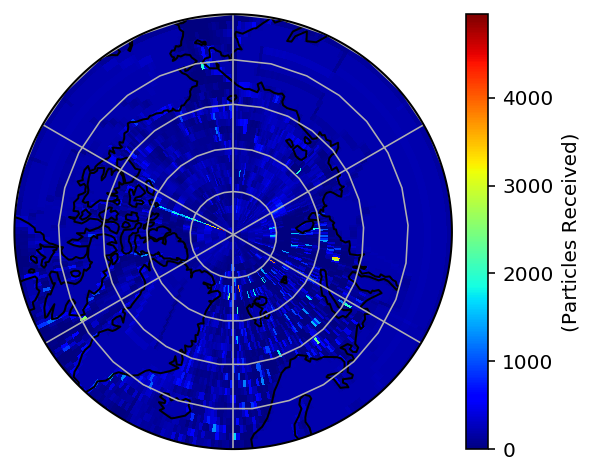

In [23]:
# Axis 0 is summing over columns (receiving):
plot.field_from_dataset(countG.lonBounds, 
                        countG.latBounds, 
                        np.sum(myTrans.counter, axis=0).reshape(countG.bindex2D.shape), 
                        polar=True,
                        units='Particles Received',
                        latRange=(60,90),
                        colormap='jet',
                        export='part_received_Rcontrol_y300_P3590x590_S2000-1-1_D30_DT1_ODT12_LAT60.5-89.5_LON-179.5-179.5.nc')

In [19]:
# Create network from numpy array (adjacency matrix)
G = nx.from_numpy_matrix(mytransmat.data, create_using=nx.DiGraph())
# Export to Pajek (.net) format for further manual processing
nx.write_pajek(G, 'out/graph_control_y300_P3590x590_S2000-1-1_D90_DT60_ODT12_LAT60.5-89.5_LON-179.5-179.5_AT2000-1-31.net')

In [52]:
countG.load_communities('out/graph_control_y300_P3590x590_S2000-1-1_D90_DT60_ODT12_LAT60.5-89.5_LON-179.5-179.5.clu')
countG.find_adjacency(mode='Moore');
countG.color_communities();

Graph is not planar!
Using 41 colors instead.


In [53]:
ice_ds = xr.open_dataset(readdir_ice+fieldfile_ice)
mesh_ds = xr.open_dataset(readdir_mesh+meshfile)

In [54]:
aice = ice_ds['aice']
tlon_mesh = mesh_ds['TLON']
tlat_mesh = mesh_ds['TLAT']

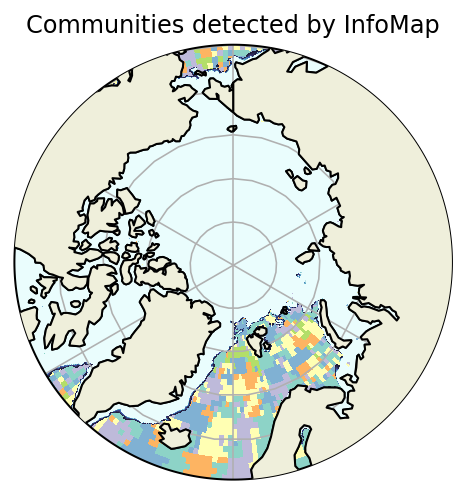

In [58]:
fig, ax = plot.from_dataset(countG.lonBounds, 
                  countG.latBounds, 
                  countG.recoloredCommunityMap, 
                  colormap = 'Set3', 
                  title = 'Communities detected by InfoMap',
                  polar = True, 
                  land = True, 
                  latRange = (60,90),
                  export = 'recolored_hr_communities_polar_land_90d.png',
                  cbar = False)

circle_clip = plot.set_circular_boundary(ax)
clip_path=(circle_clip, ax.transAxes)
ax.pcolormesh(tlon_mesh,
              tlat_mesh,
              np.ma.masked_array(aice[0,:,:], aice[0,:,:] < 0.1), 
              transform = ccrs.PlateCarree(),
              clip_path = (circle_clip, ax.transAxes),
              cmap = cmocean.cm.ice,
              vmin = 0., vmax = 1)

(<Figure size 432x288 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f568e0a9cf8>)

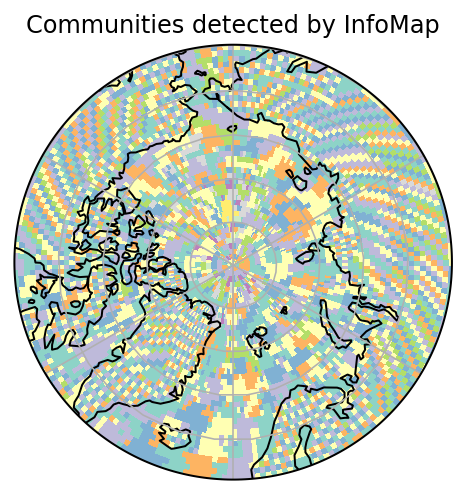

In [59]:
plot.from_dataset(countG.lonBounds, 
                  countG.latBounds, 
                  countG.recoloredCommunityMap, 
                  colormap='Set3', 
                  title='Communities detected by InfoMap',
                  polar=True, 
                  land=False, 
                  latRange=(60,90),
                  cbar=False,
                  export='recolored_hr_communities_polar_90d.png')

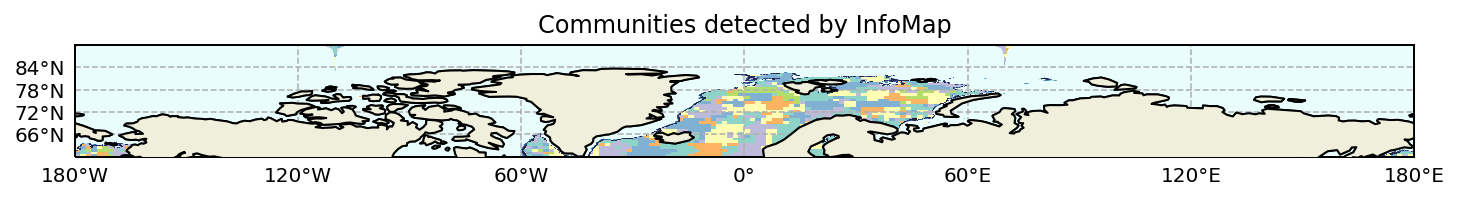

In [60]:
fig, ax = plot.from_dataset(countG.lonBounds, 
                  countG.latBounds, 
                  countG.recoloredCommunityMap, 
                  title='Communities detected by InfoMap',
                  colormap='Set3', 
                  land=True, 
                  latRange=(60,90), 
                  cbar = False,
                  export="recolored_hr_communities_land_90d.png", 
                  size=(12,4))


ax.pcolormesh(tlon_mesh,
              tlat_mesh,
              np.ma.masked_array(aice[0,:,:], aice[0,:,:] < 0.1),
              transform = ccrs.PlateCarree(),
              cmap = cmocean.cm.ice,
              vmin = 0., 
              vmax = 1)

(<Figure size 864x288 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f568df31f28>)

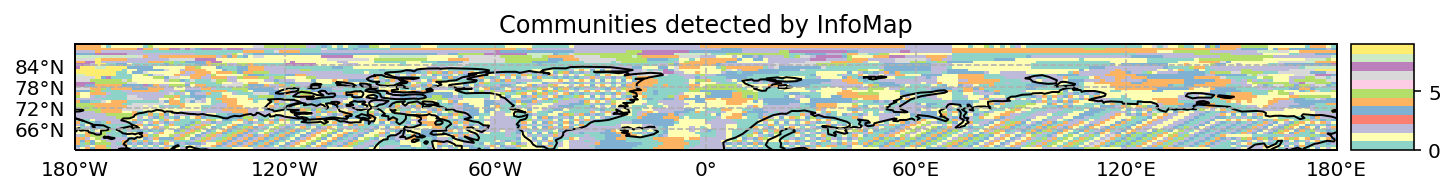

In [61]:
plot.from_dataset(countG.lonBounds, 
                  countG.latBounds, 
                  countG.recoloredCommunityMap, 
                  title='Communities detected by InfoMap',
                  colormap='Set3', 
                  land=False, 
                  latRange=(60,90), 
                  export="recolored_hr_communities_90d.png", 
                  size=(12,4))